Correlation between largest employers and Best Places to Work
Only 10 of the Best on the Largest list

In [2]:
 # Dependencies and Setup
import requests
import json

%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

import warnings
warnings.filterwarnings('ignore')


In [3]:
# Load in csv
employers = pd.read_csv("Largest_Employers.csv")
employers.head()

,Rank,Company Name,Address,Zipcode,Line of Business,Employees
0,1,Capital One Financial Corp.,"15000 Capital One Dr, Henrico, VA 23238",23238,Financial services,"13,000"
1,2,Virginia Cmnwlth. Univ. Health Syst,"1601 Willow Lawn Dr, Richmond, VA 23230",23230,Health Care,"9,313"
2,3,HCA Virginia Health System,"7101 Jahnke Rd, Richmond, VA 23225",23225,Health Care,"7,628"
3,4,Bon Secours Richmond,"Forest Ave, Richmond, VA 23229",23229,Health Care,"7,136"
4,5,Dominion Virginia Power,"400 Scott Rd, Richmond, VA 23227",23227,Energy,"5,433"


In [4]:
# Using GroupBy in order to separate the data into fields according to "Line of Business" values
lineofbusn = employers.groupby(['Line of Business'])
busn = lineofbusn['Company Name'].count().sort_values()
busn.head()

Line of Business
Agribusiness cooperative    1
Retirement community        1
Research                    1
Legal Services              1
Trucking                    1
Name: Company Name, dtype: int64

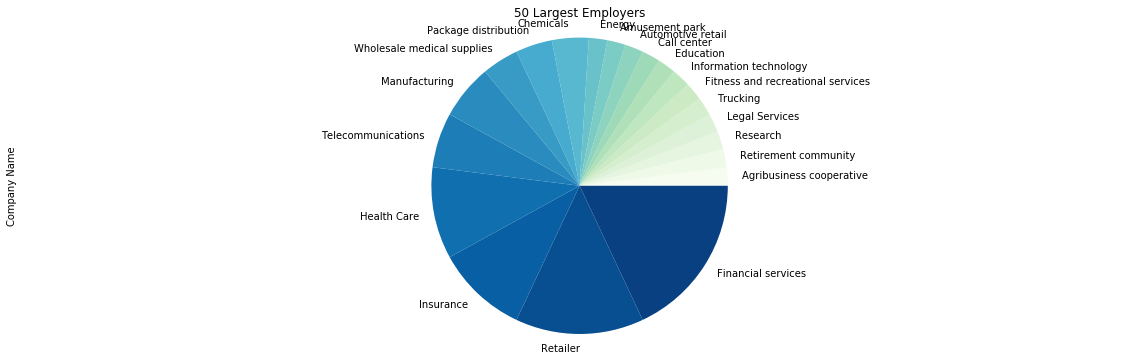

In [5]:
#plot the data as piechart and save the fig.
pieplot = busn.plot.pie(figsize=(20,6), subplots=True, cmap="GnBu")
plt.axis("equal")
plt.title("50 Largest Employers", )
plt.savefig("50 Largest Employers.png")

In [6]:
# Load in csv
towork = pd.read_csv("TopPlacestoWork.csv")
towork.head()

,Rank,Company Name,Founded,Locations,Employees,Years named,Line of Business
0,1,CarMax Inc.,1993,4,"1,531",6,Automotive retail
1,2,Capital One Financial Corp.,1994,9,"11,400",6,Financial services
2,3,Altria Group Inc.,1902,4,"3,860",5,Manufacturing
3,4,Patient First,1981,10,"1,037",4,Health care
4,1,Long & Foster Richmond Region,1968,16,857,4,Financial services


In [7]:
# Using GroupBy in order to separate the data into fields according to "Line of Business" values
lineofbusn1 = towork.groupby(['Line of Business'])
busn1 = lineofbusn1['Company Name'].count().sort_values()
busn1.head()

Line of Business
Advertising and marketing    1
Transportation               1
Telecommunications           1
Manufacturing                1
Insurance                    1
Name: Company Name, dtype: int64

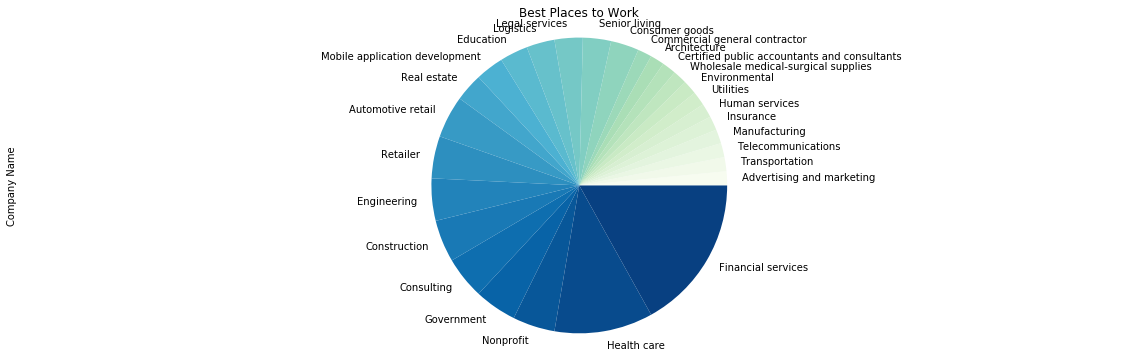

In [8]:
#plot the data as piechart and save the fig.
pieplot = busn1.plot.pie(figsize=(20,6), subplots=True, cmap="GnBu")
plt.axis("equal")
plt.title("Best Places to Work")
plt.savefig("Best Places to Work.png")

In [9]:
# Merge two dataframes using an outer join
combined_df = pd.merge(employers,towork,how='outer',on=["Company Name","Company Name"])
combined_df.head()

,Rank_x,Company Name,Address,Zipcode,Line of Business_x,Employees_x,Rank_y,Founded,Locations,Employees_y,Years named,Line of Business_y
0,1.0,Capital One Financial Corp.,"15000 Capital One Dr, Henrico, VA 23238",23238.0,Financial services,"13,000",2.0,1994.0,9.0,"11,400",6.0,Financial services
1,2.0,Virginia Cmnwlth. Univ. Health Syst,"1601 Willow Lawn Dr, Richmond, VA 23230",23230.0,Health Care,"9,313",NaN,NaN,NaN,NaN,NaN,NaN
2,3.0,HCA Virginia Health System,"7101 Jahnke Rd, Richmond, VA 23225",23225.0,Health Care,"7,628",NaN,NaN,NaN,NaN,NaN,NaN
3,4.0,Bon Secours Richmond,"Forest Ave, Richmond, VA 23229",23229.0,Health Care,"7,136",NaN,NaN,NaN,NaN,NaN,NaN
4,5.0,Dominion Virginia Power,"400 Scott Rd, Richmond, VA 23227",23227.0,Energy,"5,433",NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
#create  a data frame for for columns needed, make values integer and format values removing ,
cols = ['Employees_y','Employees_x']

combined_df[cols] = combined_df[cols].replace({',': ''}, regex = True)
combined_df[cols] = combined_df[cols].apply(pd.to_numeric, axis=1)
combined_df[cols].head()

,Employees_y,Employees_x
0,11400.0,13000.0
1,NaN,9313.0
2,NaN,7628.0
3,NaN,7136.0
4,NaN,5433.0


In [11]:
# Create the bins in which Data will be held
employees_df = combined_df[cols]
employees_df['bins_y'] = pd.cut(employees_df['Employees_y'], bins = [0, 124, 399, 999, max(employees_df['Employees_y'])])
employees_df['bins_x'] = pd.cut(employees_df['Employees_x'], bins = [0, 124, 399, 999, max(employees_df['Employees_x'])])

employees_df.head()


,Employees_y,Employees_x,bins_y,bins_x
0,11400.0,13000.0,"(999.0, 11400.0]","(999.0, 13000.0]"
1,NaN,9313.0,NaN,"(999.0, 13000.0]"
2,NaN,7628.0,NaN,"(999.0, 13000.0]"
3,NaN,7136.0,NaN,"(999.0, 13000.0]"
4,NaN,5433.0,NaN,"(999.0, 13000.0]"


In [12]:
#create a dataframe with the bins and count of each employers
size1= pd.DataFrame(employees_df.groupby('bins_y').count()['Employees_y'])
size2= pd.DataFrame(employees_df.groupby('bins_x').count()['Employees_x'])
size1

,Employees_y
bins_y,
"(0.0, 124.0]",30
"(124.0, 399.0]",21
"(399.0, 999.0]",8
"(999.0, 11400.0]",4


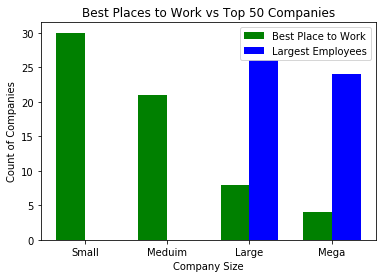

In [13]:
#create a stacked bar graph showing how many largest employers are considered best places to work
labels = ['Small', 'Meduim', 'Large', 'Mega']

x = np.arange(4)  # the label locations
width = 0.35  # the width of the bars

plt.bar(x, size1['Employees_y'], width, color='green', label='Best Place to Work')
plt.bar(x+width, size2['Employees_x'], width, color='blue', label='Largest Employees')
plt.title('Best Places to Work vs Top 50 Companies')
# Add some text for labels, title and custom x-axis tick labels, etc.
plt.ylabel('Count of Companies')
plt.xlabel('Company Size')
plt.xticks(x+ width/2, labels)

plt.legend(loc='best')
#save fig
plt.savefig("Comparision.png")
plt.show()

In [14]:
# Import the csv file as a DataFrame
women = pd.read_csv("Master_MSARegions_nohdr_csv.csv")
women.head()

,Index,In GRP,Locality,Business Name,GRP Cluster,Main Line of Business,Physical Address,Physical Address Number,Physical Pre Direction,Physical Address Name,...,Est. Accounting Annual Expense,Est. Advertising Annual Expense,Est. Business Insurance Annual Expense,Est. Legal Annual Expense,Est. Office Equipment Annual Expense,Est. Rent Annual Expense,Est. Technology Annual Expense,Est. Telecom Annual Expense,Est. Utilities Annual Expense,BusinessID
0,1,Not,Caroline,M.C.Dean Inc-Prefabrication Facility,NaN,Electric Companies,22433 Bills Way,22433,NaN,Bills,...,"$100,000 or more","$5,000 to $14,999","$100,000 or more","$100,000 or more","$25,000 to $99,999","$100,000 or more","$100,000 or more","$25,000 to $99,999","$100,000 or more",1.114000e+13
1,2,Not,Caroline,Nuambition LLC,NaN,Catalog & Mail-Order Houses,18414 Congressional Cir,18414,NaN,Congressio,...,"$25,000 to $99,999","$100,000 or more","$100,000 or more","$100,000 or more","$25,000 to $99,999","$100,000 or more","$100,000 or more","$25,000 to $99,999","$100,000 or more",1.114000e+13
2,3,Not,Caroline,McKesson,Supply Chain Management,Pharmaceutical Products Wholesale,10504 Mckesson Dr,10504,NaN,McKesson,...,"$100,000 or more","$25,000 to $99,999","$100,000 or more","$100,000 or more","$100,000 or more","$100,000 or more","$100,000 or more","$100,000 or more","$100,000 or more",1.113260e+13
3,4,Not,Caroline,Pilot Flying J,NaN,Truck Stops & Plazas,24279 Rogers Clark Blvd,24279,NaN,Rogers Cla,...,"$25,000 to $99,999","$25,000 to $99,999","$50,000 to $99,999","$25,000 to $99,999","$25,000 to $99,999","$100,000 or more","$100,000 or more","$10,000 to $24,999","$100,000 or more",1.113250e+13
4,5,Not,Caroline,Atlas Pallet Division,Supply Chain Management,Pallets & Skids Wholesale,29155 Richmond Tpke,29155,NaN,Richmond,...,"$25,000 to $99,999","$5,000 to $14,999","$50,000 to $99,999","$25,000 to $99,999","$25,000 to $99,999","$25,000 to $99,999","$25,000 to $99,999","$25,000 to $99,999","$50,000 to $99,999",1.113250e+13


In [15]:
# Using GroupBy in order to separate the data into fields according to "Main Line of Business" count
lineofbusn2 = women.groupby(['Main Line of Business'])
busn2 = lineofbusn2['Women Owned'].count()
busn2.head()

Main Line of Business
Accident & Health Insurance Carriers             1
Accountants & Accounting Services              114
Accounting, Auditing & Bookkeeping Services     69
Acoustical Contractors                           2
Acupuncturists                                   1
Name: Women Owned, dtype: int64

In [16]:
# Select specific columns from the DataFrame and save the new DataFrame
womenowned_df = women[['Women Owned', 'Business Name', 'Main Line of Business', '2017 Revenue/Yr']]
womenowned_df.head()

,Women Owned,Business Name,Main Line of Business,2017 Revenue/Yr
0,No,M.C.Dean Inc-Prefabrication Facility,Electric Companies,108029356.0
1,No,Nuambition LLC,Catalog & Mail-Order Houses,107883840.0
2,No,McKesson,Pharmaceutical Products Wholesale,59340843.0
3,No,Pilot Flying J,Truck Stops & Plazas,56740481.0
4,No,Atlas Pallet Division,Pallets & Skids Wholesale,33410993.0


In [17]:
#Select YES responses from women owned column
womenonly = womenowned_df[womenowned_df['Women Owned']=="Yes"]
womenonly.head()

,Women Owned,Business Name,Main Line of Business,2017 Revenue/Yr
17,Yes,Fixture Specialist Inc,"Plumbing, Heating, & Air Conditioning Contractors",8390928.0
31,Yes,Robinson Construction,Residential Building Construction,4869735.0
38,Yes,Ladysmith Heating & Air Cond,"Plumbing, Heating, & Air Conditioning Contractors",3872736.0
56,Yes,Arby's,Restaurants,2009366.0
66,Yes,Simply Stashing,Beddings & Linens Stores,1800361.0


In [18]:
# Using GroupBy in order to separate the data into fields according to "Line of Business" sum revenue
lineofbusn3 = womenonly.groupby(['Main Line of Business'])
busn3 = lineofbusn3['2017 Revenue/Yr'].sum()
womenbusn= pd.DataFrame(busn3)
womenbusn.head()

,2017 Revenue/Yr
Main Line of Business,
Accountants & Accounting Services,2923761.0
"Accounting, Auditing & Bookkeeping Services",3143043.0
Adjustment & Collection Services,2153249.0
Adult Day Care Centers,1616522.0
Advertising Agencies,16762838.0


In [19]:
#Select top 20 women owned companies based on revenue generated in 2017
wow = womenbusn.nlargest(20, ['2017 Revenue/Yr'], keep='first')
wow.head()

,2017 Revenue/Yr
Main Line of Business,
Restaurants,3.321874e+10
Restaurant Management,5.894497e+08
Residential Building Construction,1.671942e+08
Electric Companies,1.080294e+08
Amusement & Recreation Services,8.690018e+07


In [20]:
#find the percentage of women owned business
women_percent = (len(womenonly)/len(womenowned_df))*100
women_percent

3.8644067796610173

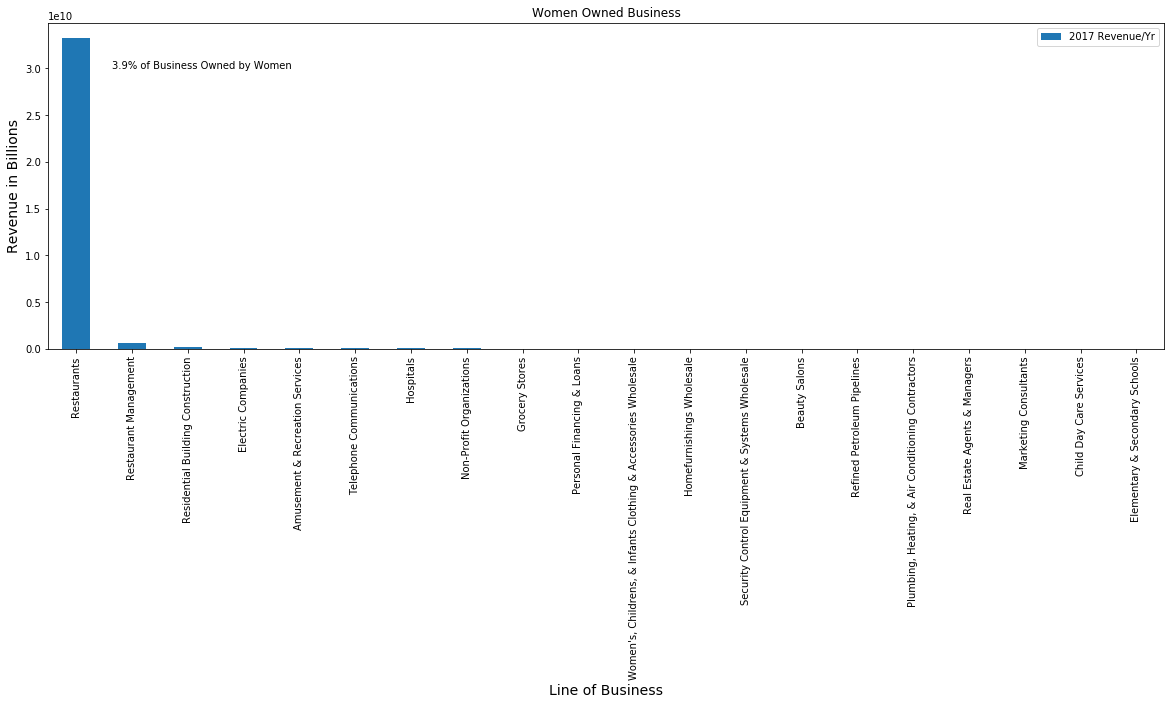

In [21]:
wow.plot(kind="bar", figsize=(20,6))
plt.text(women_percent,30000000000, str(round(women_percent, 1)) + '% of Business Owned by Women', ha = 'right', color = 'black')
plt.xlabel('Line of Business', fontsize=14)
plt.ylabel('Revenue in Billions', fontsize=14)
plt.title("Women Owned Business")
plt.savefig("Women Owned Business.png")

In [22]:
#Select NO responses from women owned column
menonly = womenowned_df[womenowned_df['Women Owned']=="No"]
menonly.head()

,Women Owned,Business Name,Main Line of Business,2017 Revenue/Yr
0,No,M.C.Dean Inc-Prefabrication Facility,Electric Companies,108029356.0
1,No,Nuambition LLC,Catalog & Mail-Order Houses,107883840.0
2,No,McKesson,Pharmaceutical Products Wholesale,59340843.0
3,No,Pilot Flying J,Truck Stops & Plazas,56740481.0
4,No,Atlas Pallet Division,Pallets & Skids Wholesale,33410993.0


In [23]:
# Using GroupBy in order to separate the data into fields according to "Line of Business" sum revenue
lineofbusn4 = menonly.groupby(['Main Line of Business'])
busn4 = lineofbusn4['2017 Revenue/Yr'].sum()
menbusn= pd.DataFrame(busn4)
menbusn.head()

,2017 Revenue/Yr
Main Line of Business,
Accident & Health Insurance Carriers,7588718.0
Accountants & Accounting Services,135388943.0
"Accounting, Auditing & Bookkeeping Services",368247812.0
Acoustical Contractors,4610400.0
Acupuncturists,235323.0


In [24]:
#Select top 20 men owned companies based on revenue generated in 2017
now = menbusn.nlargest(20, ['2017 Revenue/Yr'], keep='first')
now.head()

,2017 Revenue/Yr
Main Line of Business,
Durable Goods Wholesale,2.101555e+11
Restaurants,3.007674e+10
Grocers Wholesale,1.942449e+10
Grocery Stores,1.631414e+10
Physicians & Surgeons,1.373841e+10


In [25]:
#find the percentage of women owned business
men_percent = (len(menonly)/len(womenowned_df))*100
men_percent

96.13559322033899

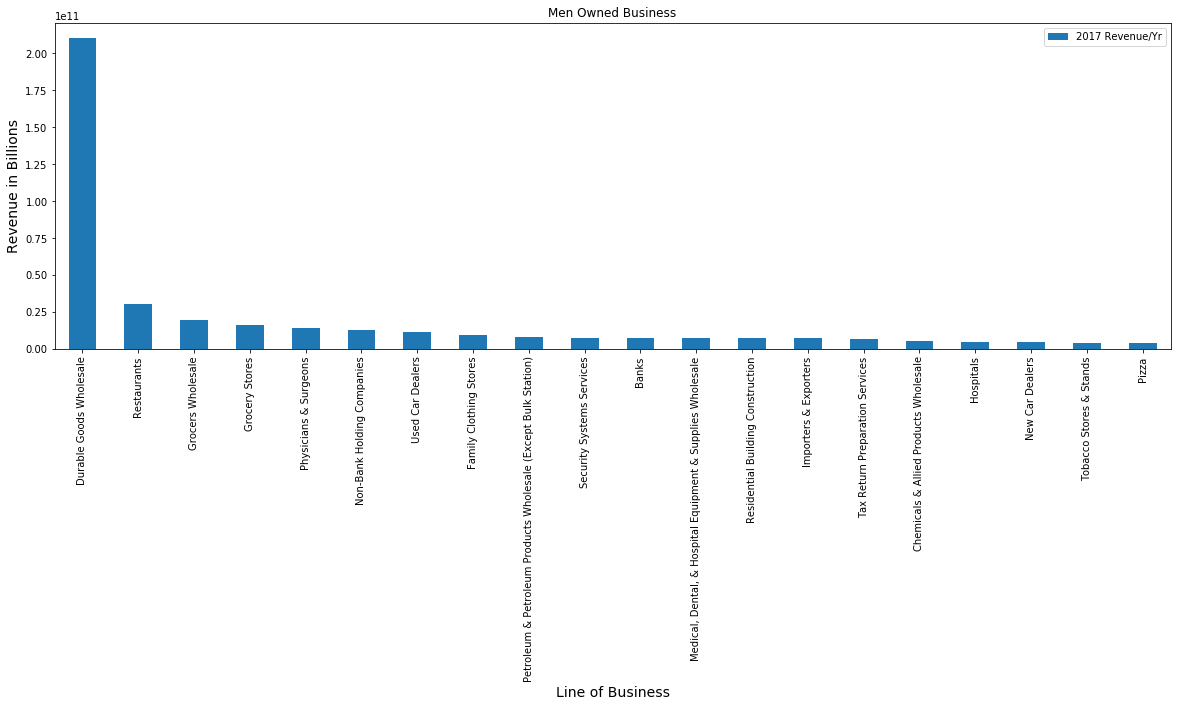

In [26]:
now.plot(kind="bar", figsize=(20,6))
# plt.text(men_percent,30000000000, str(round(men_percent, 1)) + '% of Business Owned by Men', ha = 'left', color = 'black')
plt.xlabel('Line of Business', fontsize=14)
plt.ylabel('Revenue in Billions', fontsize=14)
plt.title("Men Owned Business")
plt.savefig("Men Owned Business.png")

In [28]:
# Select specific columns from the DataFrame and save the new DataFrame
womenown_df = women[['Women Owned', 'Business Name', 'Main Line of Business', 'Revenue / Yr']]
womenown_df.head()

,Women Owned,Business Name,Main Line of Business,Revenue / Yr
0,No,M.C.Dean Inc-Prefabrication Facility,Electric Companies,108029356
1,No,Nuambition LLC,Catalog & Mail-Order Houses,107883840
2,No,McKesson,Pharmaceutical Products Wholesale,59340843
3,No,Pilot Flying J,Truck Stops & Plazas,56740481
4,No,Atlas Pallet Division,Pallets & Skids Wholesale,33410993


In [29]:
#Select YES responses from women owned column
wonly = womenown_df[womenown_df['Women Owned']=="Yes"]
wonly.head()

,Women Owned,Business Name,Main Line of Business,Revenue / Yr
17,Yes,Fixture Specialist Inc,"Plumbing, Heating, & Air Conditioning Contractors",8390928
31,Yes,Robinson Construction,Residential Building Construction,4869735
38,Yes,Ladysmith Heating & Air Cond,"Plumbing, Heating, & Air Conditioning Contractors",3872736
56,Yes,Arby's,Restaurants,2009366
66,Yes,Simply Stashing,Beddings & Linens Stores,1800361


In [30]:
# Using GroupBy in order to separate the data into fields according to "Line of Business" sum revenue
lineofbusn5 = wonly.groupby(['Main Line of Business'])
busn5 = lineofbusn5['Revenue / Yr'].sum()
wbusn= pd.DataFrame(busn5)
wbusn.head()

,Revenue / Yr
Main Line of Business,
Accountants & Accounting Services,2923761
"Accounting, Auditing & Bookkeeping Services",3143043
Adjustment & Collection Services,2153249
Adult Day Care Centers,1616522
Advertising Agencies,16762838


In [31]:
#Select top 20 men owned companies based on revenue generated in 2017
yes = wbusn.nlargest(20, ['Revenue / Yr'], keep='first')
yes.head()

,Revenue / Yr
Main Line of Business,
Restaurant Management,315900286
Residential Building Construction,167194237
Restaurants,113679862
Electric Companies,108029356
Amusement & Recreation Services,74592430


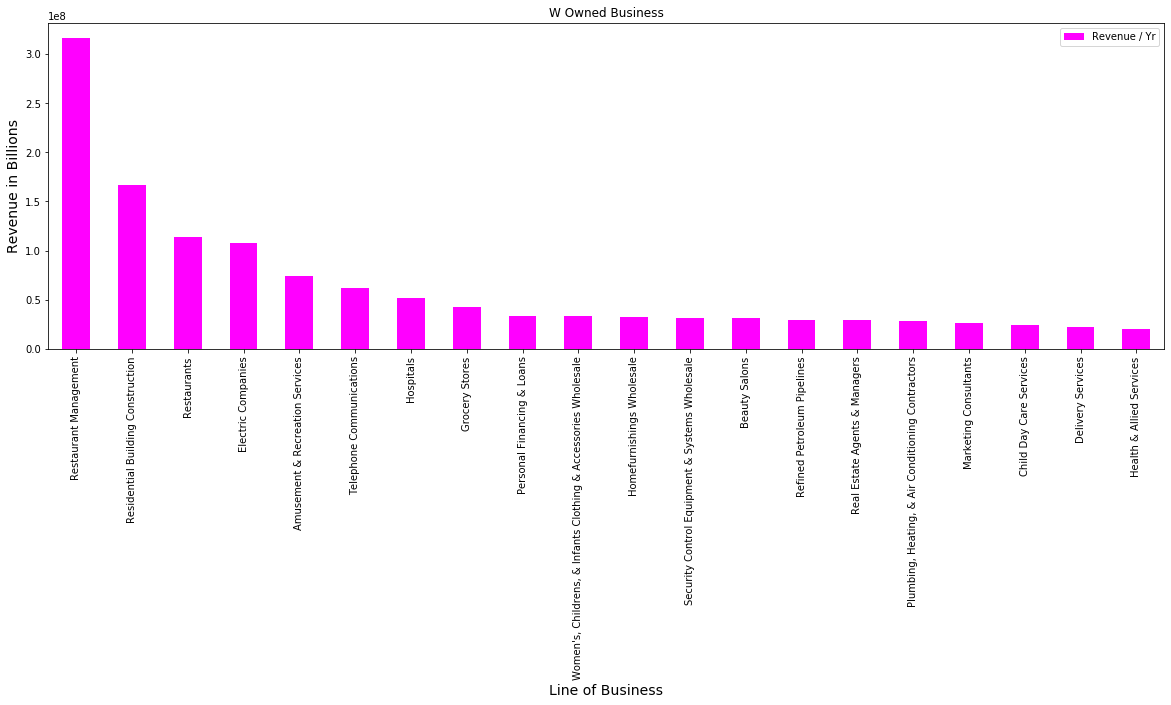

In [35]:
yes.plot(kind="bar", figsize=(20,6), color="magenta")
# plt.text(men_percent,30000000000, str(round(men_percent, 1)) + '% of Business Owned by Men', ha = 'left', color = 'black')
plt.xlabel('Line of Business', fontsize=14)
plt.ylabel('Revenue in Billions', fontsize=14)
plt.title("W Owned Business")
plt.savefig("W Owned Business.png")

In [34]:
#Select NO responses from women owned column
monly = womenown_df[womenown_df['Women Owned']=="No"]
monly.head()

,Women Owned,Business Name,Main Line of Business,Revenue / Yr
0,No,M.C.Dean Inc-Prefabrication Facility,Electric Companies,108029356
1,No,Nuambition LLC,Catalog & Mail-Order Houses,107883840
2,No,McKesson,Pharmaceutical Products Wholesale,59340843
3,No,Pilot Flying J,Truck Stops & Plazas,56740481
4,No,Atlas Pallet Division,Pallets & Skids Wholesale,33410993


In [36]:
# Using GroupBy in order to separate the data into fields according to "Line of Business" sum revenue
lineofbusn6 = monly.groupby(['Main Line of Business'])
busn6 = lineofbusn6['Revenue / Yr'].sum()
mbusn= pd.DataFrame(busn6)
mbusn.head()

,Revenue / Yr
Main Line of Business,
Accident & Health Insurance Carriers,7588718
Accountants & Accounting Services,136412259
"Accounting, Auditing & Bookkeeping Services",432058917
Acoustical Contractors,4610400
Acupuncturists,235323


In [37]:
#Select top 20 men owned companies based on revenue generated in 2017
no = mbusn.nlargest(20, ['Revenue / Yr'], keep='first')
no.head()

,Revenue / Yr
Main Line of Business,
Investment Firms,19724374769
Used Car Dealers,18745961601
Grocers Wholesale,18369390062
"Insurance Agents, Brokers, & Service",10803146589
"Medical, Dental, & Hospital Equipment & Supplies Wholesale",9520642167


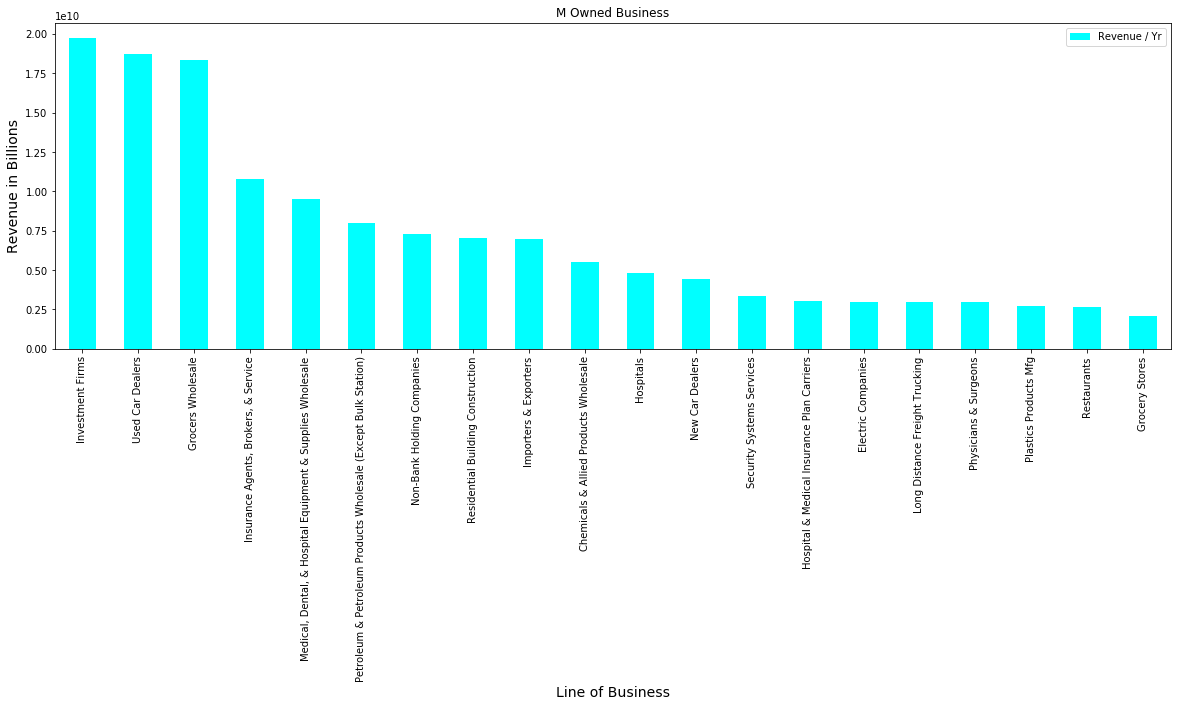

In [39]:
no.plot(kind="bar", figsize=(20,6), color="cyan")
# plt.text(men_percent,30000000000, str(round(men_percent, 1)) + '% of Business Owned by Men', ha = 'left', color = 'black')
plt.xlabel('Line of Business', fontsize=14)
plt.ylabel('Revenue in Billions', fontsize=14)
plt.title("M Owned Business")
plt.savefig("M Owned Business.png")